In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta, date

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
    # Added "inspect"

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflect an existing database into a new model
base = automap_base()
base.prepare(engine, reflect=True)

# Reflect the tables

In [7]:
base.classes.keys()

    # Map the classes
mmt = base.classes.measurement
stn = base.classes.station

session = Session(engine)

    # Use inspector to explore columns
inspector = inspect(engine)
inspector.get_table_names()
# We can view all of the classes that automap found

['measurement', 'station']

In [8]:
for c in inspector.get_columns("measurement"):
    print(c["name"],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
for c in inspector.get_columns("station"):
    print(c["name"],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Save references to each table
Measurement = session.query(mmt).all()
Station = session.query(stn).all()

In [11]:
session.query(mmt).all()
session.query(stn).all()

In [12]:
session.query(mmt).count()

19550

In [13]:
session.query(stn).count()

9

In [14]:
# Create our session (link) from Python to the DB
engine.execute('select * from measurement limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [16]:
pd.read_sql('select * from measurement limit 5',engine)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [17]:
pd.read_sql('select * from station limit 10',engine)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [18]:
session.query(mmt.date).order_by(mmt.date).all()

[('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'

In [19]:
first_date  = session.query(mmt.date).filter(mmt.date).first()
first_date

('2010-01-01')

In [20]:
last_date = session.query(mmt.date).order_by(mmt.date.desc()).first()
last_date

# year, month, day = last_date.split('-')
# f'{year}-{month}-{day}'

('2017-08-23')

In [21]:
# Calculate the date 1 year ago from the last data point in the database
pd.read_sql('select count(*) from measurement where date between "2016-08-23" and "2017-08-23"',engine)

,count(*)
0,2230


In [22]:
# Perform a query to retrieve the data and precipitation scores
scores = pd.read_sql('select prcp, date from measurement where date between "2016-08-23" and "2017-08-23"',engine)
scores

,prcp,date
0,0.00,2016-08-23
1,0.08,2016-08-24
2,0.08,2016-08-25
3,0.00,2016-08-26
4,0.00,2016-08-27
...,...,...
2225,0.09,2017-08-19
2226,NaN,2017-08-20
2227,0.56,2017-08-21
2228,0.50,2017-08-22


In [23]:
# year, month, day = last_date.split('-')
# f'{year}-{month}-{day}'
# year_ago = dt.date(int(year)-1,int(month),int(day))
# year_ago

In [24]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(scores, columns = ['date','prcp'])
df = df.set_index('date')
df = df.sort_index()
df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [25]:
df['prcp']

date
2016-08-23    0.00
2016-08-23     NaN
2016-08-23    1.79
2016-08-23    0.05
2016-08-23    0.15
              ... 
2017-08-22    0.00
2017-08-23    0.00
2017-08-23    0.00
2017-08-23    0.08
2017-08-23    0.45
Name: prcp, Length: 2230, dtype: float64

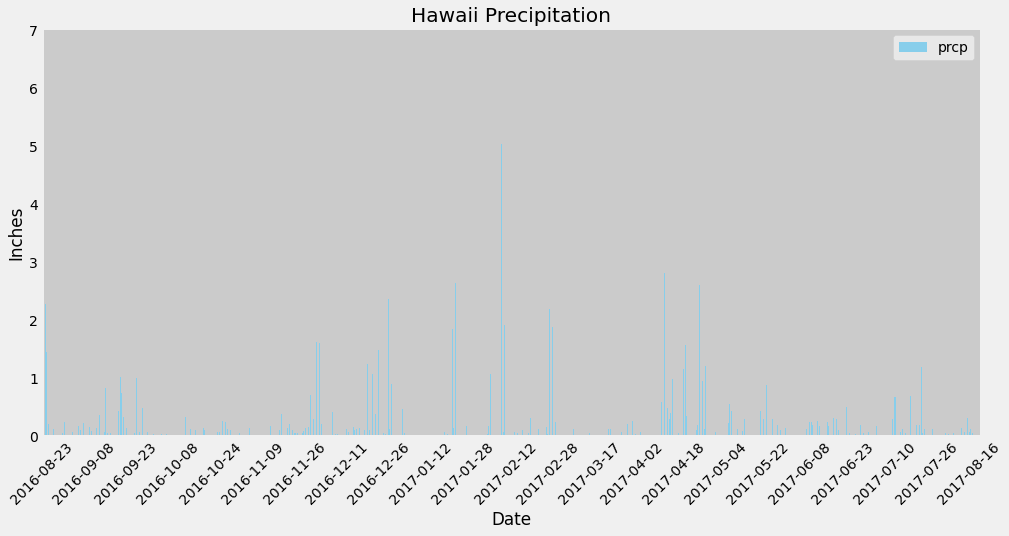

In [26]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(kind='bar', figsize=(15,7), color="skyblue")
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 100) != 0:
        t.set_visible(False)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Hawaii Precipitation')
plt.legend(loc="upper right")
# ax.patch.set_facecolor('#ffffff')
plt.savefig('Images/HawaiiPrecipitaion_BAR.png', bbox_inches='tight')
plt.show()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
# Design a query to show how many stations are available in this dataset?
session.query(stn).all()

In [29]:
(session
     .query(mmt.station)
     .distinct()
     .count()
)

9

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
scores = (session
               .query(mmt.station, func.count(mmt.tobs))
               .group_by(mmt.station)
               .order_by(func.count(mmt.tobs).desc())
               .all()
          )
for value in scores:
    print(value)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active = (session
                      .query(mmt.station, func.count(mmt.tobs))
                      .group_by(mmt.station)
                      .order_by(func.count(mmt.tobs).desc())
                      .first()
                      .station
                 )
(session
     .query(mmt.station,func.min(mmt.tobs),func.max(mmt.tobs),func.avg(mmt.tobs))
     .filter(mmt.station==active)
     .all()
)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [32]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = (session
                 .query(mmt.date)
                 .filter(mmt.station==active)
                 .order_by(mmt.date.desc())
                 .first()
            )
last_date = last_date.date
last_date

'2017-08-18'

In [33]:
year, month, day = last_date.split('-')
f'{year}-{month}-{day}'

'2017-08-18'

In [34]:
yearago = dt.date(int(year)-1,int(month),int(day))
yearago

datetime.date(2016, 8, 18)

In [35]:
station2 = (session
               .query(mmt.tobs)
               .filter(mmt.station==active)
               .filter(mmt.date>=yearago)
               .all()
          )
df = pd.DataFrame(station2)
df

,tobs
0,80.0
1,79.0
2,81.0
3,79.0
4,78.0
...,...
352,77.0
353,77.0
354,76.0
355,76.0


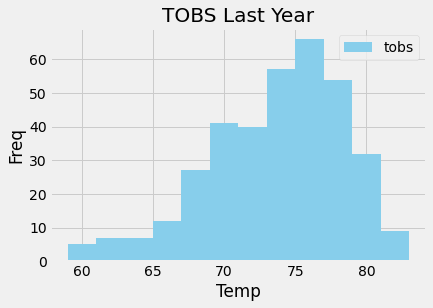

In [36]:
df.plot.hist(bins=12, color='skyblue')
plt.title("TOBS Last Year")
plt.ylabel("Freq")
plt.xlabel("Temp")
plt.savefig('Images/TOBS_Last_Year.jpg', bbox_inches='tight')
plt.show()

## Bonus Challenge Assignment

In [37]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

AttributeError: 'list' object has no attribute 'tobs'

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# Calculate the daily normals for your trip
# Push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
